In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as  plt

In [35]:
df = pd.read_csv("../data/csv_files/at200.csv")
df.size

2306744

In [36]:
# the datetime is converted to timestamp in seconds
del(df["Level: Elevation (m)"])
df = df.dropna()
df['Date Time'] = df['Date Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp() * 1000)
# df = df.apply(pd.to_numeric, errors='coerce')

In [43]:
unique_stations = df["station_id"].unique()
station_index = {}
for index,station in enumerate(unique_stations):
    station_index[station] = index
station_index

{'FPZ_04A': 0,
 'FPZ_06A': 1,
 'FEX_004': 2,
 'FSB_078': 3,
 'FSB_130D': 4,
 'FSB_079': 5,
 'FSB_097D': 6,
 'FSB_095DR': 7}

In [44]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple','turquoise','lime', 'gold', "slategray"]

In [45]:
# Downsample the data: for instance, taking every 10th point
df_downsampled = df.iloc[::10, :]
df_downsampled.size

82299

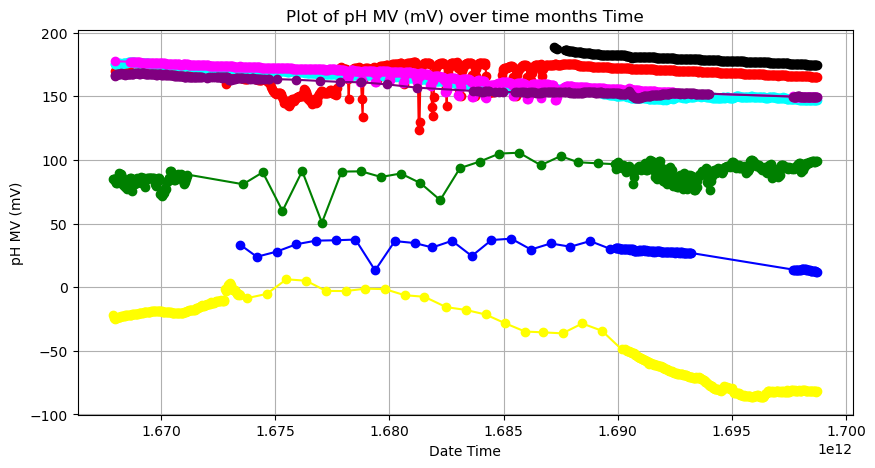

In [47]:
plt.figure(figsize=(10, 5))
for index,station in enumerate(unique_stations):
    temp = df_downsampled[df_downsampled["station_id"] == station]
    plt.plot(temp["Date Time"], temp["pH MV (mV)"], marker='o', linestyle='-', color=colors[index])


plt.xlabel('Date Time')
plt.ylabel('pH MV (mV)')
plt.title(f'Plot of pH MV (mV) over time months Time')
plt.grid(True)
plt.show()